In [ ]:
import pandas as pd
total = pd.read_csv('/content/drive/MyDrive/2차프로젝트 공유폴더/프로젝트데이터셋/total_final.csv')

In [ ]:
import numpy as np

In [ ]:
df2 = total.groupby(['고객번호','분기'])[['구매금액']].sum().reset_index()
df3=df2.pivot('고객번호','분기','구매금액')
df3=df3.reset_index()
df4=df3[df3.isna( ).any(axis=1)]
cus_list=df4.고객번호.unique()
cus_list=cus_list.tolist()
df3=df3[~df3['고객번호'].isin(cus_list)]
df3

분기,고객번호,1,2,3,4,5,6,7,8
0,1,9141590.0,10783765.0,10781550.0,23334762.0,9302985.0,8595380.0,7806580.0,5295938.0
1,2,14123470.0,10199760.0,14841180.0,7080920.0,18481480.0,9310130.0,13842600.0,12001220.0
2,3,302782.0,548433.0,648188.0,394366.0,279310.0,312970.0,421017.0,258101.0
3,4,1309643.0,3732463.0,2434410.0,1823100.0,1737292.0,1919645.0,2127112.0,1610145.0
5,6,2166006.0,3115284.0,3163273.0,2950816.0,3619234.0,2769821.0,3518094.0,3203889.0
...,...,...,...,...,...,...,...,...,...
19332,19333,613130.0,913988.0,578210.0,455450.0,850690.0,553590.0,252010.0,520430.0
19333,19334,834049.0,2705917.0,2575628.0,2819868.0,1699930.0,767309.0,484920.0,465910.0
19334,19335,937734.0,2783122.0,2320105.0,2042511.0,2199423.0,2852695.0,1553645.0,2011244.0
19335,19336,449600.0,3321870.0,3160370.0,5886390.0,2896520.0,3625250.0,6322150.0,4948690.0


In [ ]:
customer_pur_by_q=df3.copy()

In [ ]:
# 타겟 분기의 매출 변화율 이상으로 매출이 증가한 고객 : 1   / 증가하지 않은 고객 : 0
customer_pur_by_q['target7'] = np.where(customer_pur_by_q[7] / (customer_pur_by_q[1]*1.01) >= 1, 1, 0)
customer_pur_by_q['target8'] = np.where(customer_pur_by_q[8] / (customer_pur_by_q[1]*1.25) >= 1, 1, 0)

In [ ]:
a=customer_pur_by_q[['고객번호','target7']]
a.rename({'target7':'target'},axis=1,inplace=True)
a

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


분기,고객번호,target
0,1,0
1,2,0
2,3,1
3,4,1
5,6,1
...,...,...
19332,19333,0
19333,19334,0
19334,19335,1
19335,19336,1


In [ ]:
train=train.iloc[:,1:]
train

,고객번호,성별,거주지역,연령대,멤버십유무,경쟁사이용,온라인유무,Recency_R,구매횟수_F,구매금액_M,성장률_식품,성장률_패션,성장률_취미,성장률_주거,성장률_A,성장률_B,성장률_C,성장률_D,성장률,target
0,1,0,1,6,0,3,0,1,5,5,-7.749046,10.514467,19.537314,10.767839,-1.687883,-3.229486,1050.073497,0.000000,-1.224629,0
1,2,0,2,6,0,3,0,1,5,5,-20.205018,-26.855967,-90.257285,18.428603,-8.376372,4.329783,0.000000,1015.161266,-7.996814,0
2,3,0,1,6,0,0,0,2,3,1,-3.172042,0.000000,0.000000,2.735122,0.000000,0.000000,0.664081,0.000000,0.664081,1
3,4,1,1,6,0,2,0,4,2,3,4.252445,52.558412,0.000000,895.967611,4.409847,1110.613073,12.323877,0.000000,7.947751,1
4,6,1,4,6,0,0,0,4,5,4,-12.341177,8.275077,-23.829452,10.746208,15.502178,-10.446228,-90.259849,0.000000,5.040894,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18861,19333,1,0,2,1,0,1,5,5,1,2.952682,-88.161237,-88.404317,0.000000,-15.798864,-21.150330,400.159898,1155.983403,-2.022324,0
18862,19334,0,7,3,1,3,0,1,4,3,-6.806238,48.640116,29.893722,521.195565,0.000000,-5.597460,972.615851,0.000000,-1.654216,0
18863,19335,1,14,3,1,0,0,2,3,3,23.412699,29.157819,-2.022212,-2.667569,1460.575086,13.790965,37.522868,0.000000,24.920909,1
18864,19336,1,1,3,0,0,0,1,2,4,9.106455,1820.162946,0.000000,0.000000,51.810682,0.000000,0.000000,0.000000,51.810682,1


In [ ]:
train=pd.merge(train,a)

In [ ]:
train

,고객번호,성별,거주지역,연령대,멤버십유무,경쟁사이용,온라인유무,Recency_R,구매횟수_F,구매금액_M,성장률_식품,성장률_패션,성장률_취미,성장률_주거,성장률_A,성장률_B,성장률_C,성장률_D,성장률,target
0,1,0,1,6,0,3,0,1,5,5,-7.749046,10.514467,19.537314,10.767839,-1.687883,-3.229486,1050.073497,0.000000,-1.224629,0
1,2,0,2,6,0,3,0,1,5,5,-20.205018,-26.855967,-90.257285,18.428603,-8.376372,4.329783,0.000000,1015.161266,-7.996814,0
2,3,0,1,6,0,0,0,2,3,1,-3.172042,0.000000,0.000000,2.735122,0.000000,0.000000,0.664081,0.000000,0.664081,1
3,4,1,1,6,0,2,0,4,2,3,4.252445,52.558412,0.000000,895.967611,4.409847,1110.613073,12.323877,0.000000,7.947751,1
4,6,1,4,6,0,0,0,4,5,4,-12.341177,8.275077,-23.829452,10.746208,15.502178,-10.446228,-90.259849,0.000000,5.040894,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18861,19333,1,0,2,1,0,1,5,5,1,2.952682,-88.161237,-88.404317,0.000000,-15.798864,-21.150330,400.159898,1155.983403,-2.022324,0
18862,19334,0,7,3,1,3,0,1,4,3,-6.806238,48.640116,29.893722,521.195565,0.000000,-5.597460,972.615851,0.000000,-1.654216,0
18863,19335,1,14,3,1,0,0,2,3,3,23.412699,29.157819,-2.022212,-2.667569,1460.575086,13.790965,37.522868,0.000000,24.920909,1
18864,19336,1,1,3,0,0,0,1,2,4,9.106455,1820.162946,0.000000,0.000000,51.810682,0.000000,0.000000,0.000000,51.810682,1


In [ ]:
train.drop('target',axis=1,inplace=True)

In [ ]:
test=test.iloc[:,1:]
test.drop('target',axis=1,inplace=True)
test

,고객번호,성별,거주지역,연령대,멤버십유무,경쟁사이용,온라인유무,Recency_R,구매횟수_F,구매금액_M,성장률_식품,성장률_패션,성장률_취미,성장률_주거,성장률_A,성장률_B,성장률_C,성장률_D,성장률
0,1,0,1,6,0,3,0,1,5,5,-16.064469,-1.336305,-85.411556,-87.753885,-2.796005,31.261208,260.363408,0.000000,-2.596810
1,2,0,2,6,0,3,0,2,4,5,-11.955996,-4.148527,-7.383545,29.657705,-0.351198,-82.109738,0.000000,494.167345,-0.334226
2,3,0,1,6,0,0,0,1,2,1,2.533364,0.000000,0.000000,14.215618,0.000000,0.000000,5.648077,0.000000,5.648077
3,4,1,1,6,0,2,0,4,3,3,2.176402,22.341157,412.969325,663.893787,3.727955,781.524436,8.880659,0.000000,8.419210
4,6,1,4,6,0,0,0,4,5,4,5.693845,18.982724,-10.834145,26.650762,8.945054,9.891598,-85.640540,0.000000,8.419641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18861,19333,1,0,2,1,0,1,2,4,1,-10.469206,-83.105114,-83.394692,0.000000,-14.519575,-36.456705,406.229387,516.867562,-13.772816
18862,19334,0,7,3,1,3,0,1,3,2,-32.596766,68.109855,64.998079,307.218476,751.812274,-43.756968,551.572121,0.000000,-8.642034
18863,19335,1,14,3,1,0,0,3,3,3,10.667814,30.766049,-2.421228,-13.913748,0.000000,5.481793,38.608779,0.000000,8.779073
18864,19336,1,1,3,0,0,0,1,1,4,13.318750,1031.114272,531.960458,0.000000,55.263794,435.194092,0.000000,0.000000,55.360192


In [ ]:
test=pd.merge(test,b)
test

,고객번호,성별,거주지역,연령대,멤버십유무,경쟁사이용,온라인유무,Recency_R,구매횟수_F,구매금액_M,...,성장률_패션,성장률_취미,성장률_주거,성장률_A,성장률_B,성장률_C,성장률_D,성장률,target8,target
0,1,0,1,6,0,3,0,1,5,5,...,-1.336305,-85.411556,-87.753885,-2.796005,31.261208,260.363408,0.000000,-2.596810,0,0
1,2,0,2,6,0,3,0,2,4,5,...,-4.148527,-7.383545,29.657705,-0.351198,-82.109738,0.000000,494.167345,-0.334226,0,0
2,3,0,1,6,0,0,0,1,2,1,...,0.000000,0.000000,14.215618,0.000000,0.000000,5.648077,0.000000,5.648077,0,0
3,4,1,1,6,0,2,0,4,3,3,...,22.341157,412.969325,663.893787,3.727955,781.524436,8.880659,0.000000,8.419210,0,0
4,6,1,4,6,0,0,0,4,5,4,...,18.982724,-10.834145,26.650762,8.945054,9.891598,-85.640540,0.000000,8.419641,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18861,19333,1,0,2,1,0,1,2,4,1,...,-83.105114,-83.394692,0.000000,-14.519575,-36.456705,406.229387,516.867562,-13.772816,0,0
18862,19334,0,7,3,1,3,0,1,3,2,...,68.109855,64.998079,307.218476,751.812274,-43.756968,551.572121,0.000000,-8.642034,0,0
18863,19335,1,14,3,1,0,0,3,3,3,...,30.766049,-2.421228,-13.913748,0.000000,5.481793,38.608779,0.000000,8.779073,1,1
18864,19336,1,1,3,0,0,0,1,1,4,...,1031.114272,531.960458,0.000000,55.263794,435.194092,0.000000,0.000000,55.360192,1,1


In [ ]:
test2=test.drop(['성장률_C','성장률_D','target8'],axis=1)

In [ ]:
test2=test.drop(['성장률_C','성장률_D'],axis=1)
train2=train.drop(['성장률_C','성장률_D'],axis=1)

In [ ]:
b=customer_pur_by_q[['고객번호','target8']]
b.rename({'target8':'target'},axis=1,inplace=True)
b

분기,고객번호,target
0,1,0
1,2,0
2,3,0
3,4,0
5,6,1
...,...,...
19332,19333,0
19333,19334,0
19334,19335,1
19335,19336,1


In [ ]:
len(cus_list)

517

In [ ]:
df=total.copy()
df=df[~df['고객번호'].isin(cus_list)]
df=df.iloc[:,1:]
df

,대분류코드,중분류코드,소분류코드,중분류명,소분류명,대분류,영수증번호,고객번호,점포코드,구매일자,구매시간,구매금액,성별,연령대,거주지역,년도,분류,분기,제휴사
0,1,101,A010101,일용잡화,위생세제,일상용품,2757986,15148,10,20140920,20,1000,1,5,2.0,2014,저가,3,A
1,1,101,A010101,일용잡화,위생세제,일상용품,1878938,15148,10,20140505,19,15000,1,5,2.0,2014,저가,2,A
2,1,101,A010101,일용잡화,위생세제,일상용품,3436437,15148,10,20150102,16,9900,1,5,2.0,2015,저가,5,A
3,1,101,A010103,일용잡화,뷰티상품,일상용품,1385676,15148,10,20140215,17,7000,1,5,2.0,2014,저가,1,A
4,1,101,A010103,일용잡화,뷰티상품,일상용품,1547466,15148,10,20140315,19,21000,1,5,2.0,2014,중가,1,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28592700,17,1707,C170701,가정잡화,생활잡화균일가,일상용품,10883509,18839,306,20140621,14,3000,1,5,NaN,2014,저가,2,C
28592701,17,1707,C170701,가정잡화,생활잡화균일가,일상용품,10882271,18839,306,20140407,10,1000,1,5,NaN,2014,저가,2,C
28592702,17,1707,C170701,가정잡화,생활잡화균일가,일상용품,10882525,18839,306,20140423,11,2000,1,5,NaN,2014,저가,2,C
28592703,17,1707,C170701,가정잡화,생활잡화균일가,일상용품,10883328,18839,306,20140611,14,2000,1,5,NaN,2014,저가,2,C


In [ ]:
df=df.reset_index().iloc[:,1:]
df

,대분류코드,중분류코드,소분류코드,중분류명,소분류명,대분류,영수증번호,고객번호,점포코드,구매일자,구매시간,구매금액,성별,연령대,거주지역,년도,분류,분기,제휴사
0,1,101,A010101,일용잡화,위생세제,일상용품,2757986,15148,10,20140920,20,1000,1,5,2.0,2014,저가,3,A
1,1,101,A010101,일용잡화,위생세제,일상용품,1878938,15148,10,20140505,19,15000,1,5,2.0,2014,저가,2,A
2,1,101,A010101,일용잡화,위생세제,일상용품,3436437,15148,10,20150102,16,9900,1,5,2.0,2015,저가,5,A
3,1,101,A010103,일용잡화,뷰티상품,일상용품,1385676,15148,10,20140215,17,7000,1,5,2.0,2014,저가,1,A
4,1,101,A010103,일용잡화,뷰티상품,일상용품,1547466,15148,10,20140315,19,21000,1,5,2.0,2014,중가,1,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28255863,17,1707,C170701,가정잡화,생활잡화균일가,일상용품,10883509,18839,306,20140621,14,3000,1,5,NaN,2014,저가,2,C
28255864,17,1707,C170701,가정잡화,생활잡화균일가,일상용품,10882271,18839,306,20140407,10,1000,1,5,NaN,2014,저가,2,C
28255865,17,1707,C170701,가정잡화,생활잡화균일가,일상용품,10882525,18839,306,20140423,11,2000,1,5,NaN,2014,저가,2,C
28255866,17,1707,C170701,가정잡화,생활잡화균일가,일상용품,10883328,18839,306,20140611,14,2000,1,5,NaN,2014,저가,2,C


In [ ]:
cate4_sum = df.pivot_table(index='고객번호', columns=['대분류','분기'], values='구매금액', aggfunc=sum)
cate4_sum = cate4_sum.stack().fillna(0)
cate4_sum

대분류            가공식품  가구/인테리어   교육/문화용품        기타     디지털/가전      신선식품  \
고객번호  분기                                                                
1     1   1830570.0      0.0  103740.0  711900.0   296490.0       0.0   
      2   2966705.0      0.0   73720.0   66500.0   241240.0   15480.0   
      3   1160590.0      0.0  246450.0  463400.0   133840.0   22210.0   
      4   1583440.0      0.0   55000.0  473500.0  4709570.0  288682.0   
      5   1945226.0      0.0       0.0  133240.0   108590.0  162579.0   
...             ...      ...       ...       ...        ...       ...   
19337 4    321180.0      0.0       0.0       0.0     6960.0  106420.0   
      5    284100.0      0.0    7800.0       0.0    16740.0   34210.0   
      6    334450.0      0.0       0.0       0.0    29010.0   75700.0   
      7    564120.0      0.0    4990.0       0.0    33700.0  178090.0   
      8    411220.0      0.0       0.0       0.0    32080.0  105870.0   

대분류           음식점         의류  의약품/의료기기        일상용품  전문스포츠/레저       패션잡화  
고객번호  분기                                                                 
1     1   21800.0  1580990.0       0.0   2647360.0       0.0  1948740.0  
      2       0.0  1317270.0       0.0   3356420.0       0.0  2746430.0  
      3       0.0  3391330.0       0.0   3534310.0       0.0  1829420.0  
      4   48400.0  1682360.0       0.0  12377220.0       0.0  2116590.0  
      5   12500.0  2166590.0       0.0   2049550.0       0.0  2724710.0  
...           ...        ...       ...         ...       ...        ...  
19337 4    9980.0        0.0       0.0     82970.0       0.0   238000.0  
      5    7920.0        0.0       0.0    113800.0       0.0    69800.0  
      6   10440.0        0.0       0.0    210660.0       0.0        0.0  
      7   20330.0        0.0       0.0    415240.0       0.0        0.0  
      8    5960.0   138000.0       0.0    335860.0       0.0    79000.0  

[150928 rows x 12 columns]

In [ ]:
cate4_sum['식품'] = (cate4_sum['가공식품'] + cate4_sum[ '신선식품']) 
cate4_sum['패션'] = (cate4_sum['의류'] + cate4_sum[ '패션잡화']) 
cate4_sum['취미'] = (cate4_sum['교육/문화용품'] + cate4_sum[ '전문스포츠/레저']) 
cate4_sum['주거'] = (cate4_sum['디지털/가전'] + cate4_sum[ '가구/인테리어']) 
cate4_sum = cate4_sum.iloc[:,12:]
cate4_sum = cate4_sum.unstack().fillna(0)
cate4_sum

대분류           식품                                                         \
분기             1          2          3          4          5          6   
고객번호                                                                      
1      1830570.0  2982185.0  1182800.0  1872122.0  2107805.0  1223040.0   
2      2907240.0  2691440.0  1844100.0  1835670.0  1903230.0   940500.0   
3       293992.0   428233.0   523398.0   316246.0   242070.0   250230.0   
4       739303.0  1157683.0   673990.0   458920.0   956382.0   910445.0   
6      1063546.0   985924.0  1194513.0   979666.0  1451404.0   550471.0   
...          ...        ...        ...        ...        ...        ...   
19333   478630.0   807288.0   531570.0   419840.0   840150.0   553590.0   
19334   733249.0  2342237.0  2188328.0  2264168.0   920860.0   515449.0   
19335   318530.0  1152012.0  1068495.0  1155631.0  1031573.0   911905.0   
19336   449600.0   544120.0  1025670.0   705460.0   580000.0   695150.0   
19337     9730.0    71970.0   428969.0   427600.0   318310.0   410150.0   

대분류                                 패션             ...        취미            \
분기             7          8          1          2  ...         7         8   
고객번호                                               ...                       
1       640120.0   492688.0  3529730.0  4063700.0  ...       0.0       0.0   
2      1354190.0  1732140.0  1421950.0   916670.0  ...   71900.0       0.0   
3       341607.0   229271.0        0.0    80000.0  ...       0.0       0.0   
4       841252.0   775805.0    79600.0  1087350.0  ...   18220.0       0.0   
6      1482704.0  1103439.0   295000.0    98000.0  ...    9800.0    1900.0   
...          ...        ...        ...        ...  ...       ...       ...   
19333   246510.0   520430.0    43000.0        0.0  ...       0.0       0.0   
19334    68760.0    93910.0     7000.0     9100.0  ...  227000.0       0.0   
19335   585165.0   610854.0    19000.0   378100.0  ...  112760.0  141540.0   
19336   952000.0   463100.0        0.0  1575150.0  ...   63700.0       0.0   
19337   742210.0   517090.0        0.0        0.0  ...    4990.0       0.0   

대분류          주거                                                        \
분기            1         2          3          4          5          6   
고객번호                                                                    
1      296490.0  241240.0   133840.0  4709570.0   108590.0   494400.0   
2      554900.0  583100.0  1817220.0  1225680.0   806960.0  1292700.0   
3        4500.0    1380.0     2850.0     9980.0    11830.0     5150.0   
4           0.0  423050.0   150000.0   321900.0        0.0    98000.0   
6      170000.0  897800.0   410000.0   487500.0  1158400.0   283200.0   
...         ...       ...        ...        ...        ...        ...   
19333       0.0       0.0     3240.0        0.0        0.0        0.0   
19334       0.0   55500.0    95510.0    58150.0   293120.0     9250.0   
19335  123290.0   51100.0    29800.0    13400.0        0.0   107700.0   
19336       0.0       0.0        0.0        0.0        0.0        0.0   
19337       0.0       0.0    18190.0     6960.0    16740.0    29010.0   

대분류                          
분기             7          8  
고객번호                         
1            0.0   142730.0  
2      2636360.0  2545400.0  
3         9990.0     9960.0  
4       198700.0        0.0  
6       701610.0   539300.0  
...          ...        ...  
19333        0.0        0.0  
19334     4560.0     3600.0  
19335    50180.0   150800.0  
19336        0.0   159000.0  
19337    33700.0    32080.0  

[18866 rows x 32 columns]

In [ ]:
cate4_sum['식품']

분기,1,2,3,4,5,6,7,8
고객번호,,,,,,,,
1,1830570.0,2982185.0,1182800.0,1872122.0,2107805.0,1223040.0,640120.0,492688.0
2,2907240.0,2691440.0,1844100.0,1835670.0,1903230.0,940500.0,1354190.0,1732140.0
3,293992.0,428233.0,523398.0,316246.0,242070.0,250230.0,341607.0,229271.0
4,739303.0,1157683.0,673990.0,458920.0,956382.0,910445.0,841252.0,775805.0
6,1063546.0,985924.0,1194513.0,979666.0,1451404.0,550471.0,1482704.0,1103439.0
...,...,...,...,...,...,...,...,...
19333,478630.0,807288.0,531570.0,419840.0,840150.0,553590.0,246510.0,520430.0
19334,733249.0,2342237.0,2188328.0,2264168.0,920860.0,515449.0,68760.0,93910.0
19335,318530.0,1152012.0,1068495.0,1155631.0,1031573.0,911905.0,585165.0,610854.0


In [ ]:
cate4_sum=cate4_sum.replace(0,1)

In [ ]:
def get_train_test_growth_rate(df,n,number):
  df2 = pd.DataFrame()
  col=df.columns.tolist()
  col_list = [col[i * n:(i + 1) * n] for i in range((len(col) + n - 1) // n )] 
  for i in col_list:
    for j in range(len(col_list)):
      name = '성장률'+'_'+i[j][0] 
      df2[name]=(((df[i[number-1]]/df[i[0]])**(1/(number-1)))-1)*100
  
  return df2.reset_index()

In [ ]:
def get_target(df,number):
  df2 = pd.DataFrame()
  a = (((df[number].sum()/df[1].sum())**(1/(number-1)))-1)*100
  df['성장률']=(((df[number]/df[1])**(1/(number-1)))-1)*100
  df['target']=np.where(df['성장률']>a,1,0)
  df2 = df[['고객번호','target']]

  return df2



In [ ]:
def get_cus_growth_rate(df,number):
  df2 = pd.DataFrame()
  df['성장률']=(((df[number]/df[1])**(1/(number-1)))-1)*100
  df2 = df[['고객번호','성장률']]

  return df2

In [ ]:
train_target = get_target(df=df3,number=7)
test_target = get_target(df=df3,number=8)

In [ ]:
train_set=get_train_test_growth_rate(df=cate4_sum,n=8,number=6)
test_set=get_train_test_growth_rate(df=cate4_sum,n=8,number=7)

In [ ]:
train_set_aff=get_train_test_growth_rate(df=cate4_sum2,n=8,number=6)
test_set_aff=get_train_test_growth_rate(df=cate4_sum2,n=8,number=7)

In [ ]:
train_cus_groth = get_cus_growth_rate(df=df3,number=6)
test_cus_groth = get_cus_growth_rate(df=df3,number=7)

In [ ]:
train=pd.merge(train_property,train_set)
train

,고객번호,성별,거주지역,연령대,멤버십유무,경쟁사이용,온라인유무,Recency_R,구매횟수_F,구매금액_M,성장률_식품,성장률_패션,성장률_취미,성장률_주거
0,1,0,1,6,0,3,0,1,5,5,-7.749046,10.514467,19.537314,10.767839
1,2,0,2,6,0,3,0,1,5,5,-20.205018,-26.855967,-90.257285,18.428603
2,3,0,1,6,0,0,0,2,3,1,-3.172042,0.000000,0.000000,2.735122
3,4,1,1,6,0,2,0,4,2,3,4.252445,52.558412,0.000000,895.967611
4,6,1,4,6,0,0,0,4,5,4,-12.341177,8.275077,-23.829452,10.746208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18861,19333,1,0,2,1,0,1,5,5,1,2.952682,-88.161237,-88.404317,0.000000
18862,19334,0,7,3,1,3,0,1,4,3,-6.806238,48.640116,29.893722,521.195565
18863,19335,1,14,3,1,0,0,2,3,3,23.412699,29.157819,-2.022212,-2.667569
18864,19336,1,1,3,0,0,0,1,2,4,9.106455,1820.162946,0.000000,0.000000


In [ ]:
train=pd.merge(train,train_set_aff)
train

,고객번호,성별,거주지역,연령대,멤버십유무,경쟁사이용,온라인유무,Recency_R,구매횟수_F,구매금액_M,성장률_식품,성장률_패션,성장률_취미,성장률_주거,성장률_A,성장률_B,성장률_C,성장률_D
0,1,0,1,6,0,3,0,1,5,5,-7.749046,10.514467,19.537314,10.767839,-1.687883,-3.229486,1050.073497,0.000000
1,2,0,2,6,0,3,0,1,5,5,-20.205018,-26.855967,-90.257285,18.428603,-8.376372,4.329783,0.000000,1015.161266
2,3,0,1,6,0,0,0,2,3,1,-3.172042,0.000000,0.000000,2.735122,0.000000,0.000000,0.664081,0.000000
3,4,1,1,6,0,2,0,4,2,3,4.252445,52.558412,0.000000,895.967611,4.409847,1110.613073,12.323877,0.000000
4,6,1,4,6,0,0,0,4,5,4,-12.341177,8.275077,-23.829452,10.746208,15.502178,-10.446228,-90.259849,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18861,19333,1,0,2,1,0,1,5,5,1,2.952682,-88.161237,-88.404317,0.000000,-15.798864,-21.150330,400.159898,1155.983403
18862,19334,0,7,3,1,3,0,1,4,3,-6.806238,48.640116,29.893722,521.195565,0.000000,-5.597460,972.615851,0.000000
18863,19335,1,14,3,1,0,0,2,3,3,23.412699,29.157819,-2.022212,-2.667569,1460.575086,13.790965,37.522868,0.000000
18864,19336,1,1,3,0,0,0,1,2,4,9.106455,1820.162946,0.000000,0.000000,51.810682,0.000000,0.000000,0.000000


In [ ]:
train=pd.merge(train,train_cus_groth)
train

,고객번호,성별,거주지역,연령대,멤버십유무,경쟁사이용,온라인유무,Recency_R,구매횟수_F,구매금액_M,성장률_식품,성장률_패션,성장률_취미,성장률_주거,성장률_A,성장률_B,성장률_C,성장률_D,성장률
0,1,0,1,6,0,3,0,1,5,5,-7.749046,10.514467,19.537314,10.767839,-1.687883,-3.229486,1050.073497,0.000000,-1.224629
1,2,0,2,6,0,3,0,1,5,5,-20.205018,-26.855967,-90.257285,18.428603,-8.376372,4.329783,0.000000,1015.161266,-7.996814
2,3,0,1,6,0,0,0,2,3,1,-3.172042,0.000000,0.000000,2.735122,0.000000,0.000000,0.664081,0.000000,0.664081
3,4,1,1,6,0,2,0,4,2,3,4.252445,52.558412,0.000000,895.967611,4.409847,1110.613073,12.323877,0.000000,7.947751
4,6,1,4,6,0,0,0,4,5,4,-12.341177,8.275077,-23.829452,10.746208,15.502178,-10.446228,-90.259849,0.000000,5.040894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18861,19333,1,0,2,1,0,1,5,5,1,2.952682,-88.161237,-88.404317,0.000000,-15.798864,-21.150330,400.159898,1155.983403,-2.022324
18862,19334,0,7,3,1,3,0,1,4,3,-6.806238,48.640116,29.893722,521.195565,0.000000,-5.597460,972.615851,0.000000,-1.654216
18863,19335,1,14,3,1,0,0,2,3,3,23.412699,29.157819,-2.022212,-2.667569,1460.575086,13.790965,37.522868,0.000000,24.920909
18864,19336,1,1,3,0,0,0,1,2,4,9.106455,1820.162946,0.000000,0.000000,51.810682,0.000000,0.000000,0.000000,51.810682


In [ ]:
train=pd.merge(train,train_target)
train

,고객번호,성별,거주지역,연령대,멤버십유무,경쟁사이용,온라인유무,Recency_R,구매횟수_F,구매금액_M,성장률_식품,성장률_패션,성장률_취미,성장률_주거,성장률_A,성장률_B,성장률_C,성장률_D,성장률,target
0,1,0,1,6,0,3,0,1,5,5,-7.749046,10.514467,19.537314,10.767839,-1.687883,-3.229486,1050.073497,0.000000,-1.224629,0
1,2,0,2,6,0,3,0,1,5,5,-20.205018,-26.855967,-90.257285,18.428603,-8.376372,4.329783,0.000000,1015.161266,-7.996814,0
2,3,0,1,6,0,0,0,2,3,1,-3.172042,0.000000,0.000000,2.735122,0.000000,0.000000,0.664081,0.000000,0.664081,1
3,4,1,1,6,0,2,0,4,2,3,4.252445,52.558412,0.000000,895.967611,4.409847,1110.613073,12.323877,0.000000,7.947751,1
4,6,1,4,6,0,0,0,4,5,4,-12.341177,8.275077,-23.829452,10.746208,15.502178,-10.446228,-90.259849,0.000000,5.040894,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18861,19333,1,0,2,1,0,1,5,5,1,2.952682,-88.161237,-88.404317,0.000000,-15.798864,-21.150330,400.159898,1155.983403,-2.022324,0
18862,19334,0,7,3,1,3,0,1,4,3,-6.806238,48.640116,29.893722,521.195565,0.000000,-5.597460,972.615851,0.000000,-1.654216,0
18863,19335,1,14,3,1,0,0,2,3,3,23.412699,29.157819,-2.022212,-2.667569,1460.575086,13.790965,37.522868,0.000000,24.920909,1
18864,19336,1,1,3,0,0,0,1,2,4,9.106455,1820.162946,0.000000,0.000000,51.810682,0.000000,0.000000,0.000000,51.810682,1


In [ ]:
test=pd.merge(test_property,test_set)
test

,고객번호,성별,거주지역,연령대,멤버십유무,경쟁사이용,온라인유무,Recency_R,구매횟수_F,구매금액_M,성장률_식품,성장률_패션,성장률_취미,성장률_주거
0,1,0,1,6,0,3,0,1,5,5,-16.064469,-1.336305,-85.411556,-87.753885
1,2,0,2,6,0,3,0,2,4,5,-11.955996,-4.148527,-7.383545,29.657705
2,3,0,1,6,0,0,0,1,2,1,2.533364,0.000000,0.000000,14.215618
3,4,1,1,6,0,2,0,4,3,3,2.176402,22.341157,412.969325,663.893787
4,6,1,4,6,0,0,0,4,5,4,5.693845,18.982724,-10.834145,26.650762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18861,19333,1,0,2,1,0,1,2,4,1,-10.469206,-83.105114,-83.394692,0.000000
18862,19334,0,7,3,1,3,0,1,3,2,-32.596766,68.109855,64.998079,307.218476
18863,19335,1,14,3,1,0,0,3,3,3,10.667814,30.766049,-2.421228,-13.913748
18864,19336,1,1,3,0,0,0,1,1,4,13.318750,1031.114272,531.960458,0.000000


In [ ]:
test=pd.merge(test,test_set_aff)
test

,고객번호,성별,거주지역,연령대,멤버십유무,경쟁사이용,온라인유무,Recency_R,구매횟수_F,구매금액_M,성장률_식품,성장률_패션,성장률_취미,성장률_주거,성장률_A,성장률_B,성장률_C,성장률_D
0,1,0,1,6,0,3,0,1,5,5,-16.064469,-1.336305,-85.411556,-87.753885,-2.796005,31.261208,260.363408,0.000000
1,2,0,2,6,0,3,0,2,4,5,-11.955996,-4.148527,-7.383545,29.657705,-0.351198,-82.109738,0.000000,494.167345
2,3,0,1,6,0,0,0,1,2,1,2.533364,0.000000,0.000000,14.215618,0.000000,0.000000,5.648077,0.000000
3,4,1,1,6,0,2,0,4,3,3,2.176402,22.341157,412.969325,663.893787,3.727955,781.524436,8.880659,0.000000
4,6,1,4,6,0,0,0,4,5,4,5.693845,18.982724,-10.834145,26.650762,8.945054,9.891598,-85.640540,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18861,19333,1,0,2,1,0,1,2,4,1,-10.469206,-83.105114,-83.394692,0.000000,-14.519575,-36.456705,406.229387,516.867562
18862,19334,0,7,3,1,3,0,1,3,2,-32.596766,68.109855,64.998079,307.218476,751.812274,-43.756968,551.572121,0.000000
18863,19335,1,14,3,1,0,0,3,3,3,10.667814,30.766049,-2.421228,-13.913748,0.000000,5.481793,38.608779,0.000000
18864,19336,1,1,3,0,0,0,1,1,4,13.318750,1031.114272,531.960458,0.000000,55.263794,435.194092,0.000000,0.000000


In [ ]:
test=pd.merge(test,test_cus_groth)
test

,고객번호,성별,거주지역,연령대,멤버십유무,경쟁사이용,온라인유무,Recency_R,구매횟수_F,구매금액_M,성장률_식품,성장률_패션,성장률_취미,성장률_주거,성장률_A,성장률_B,성장률_C,성장률_D,성장률
0,1,0,1,6,0,3,0,1,5,5,-16.064469,-1.336305,-85.411556,-87.753885,-2.796005,31.261208,260.363408,0.000000,-2.596810
1,2,0,2,6,0,3,0,2,4,5,-11.955996,-4.148527,-7.383545,29.657705,-0.351198,-82.109738,0.000000,494.167345,-0.334226
2,3,0,1,6,0,0,0,1,2,1,2.533364,0.000000,0.000000,14.215618,0.000000,0.000000,5.648077,0.000000,5.648077
3,4,1,1,6,0,2,0,4,3,3,2.176402,22.341157,412.969325,663.893787,3.727955,781.524436,8.880659,0.000000,8.419210
4,6,1,4,6,0,0,0,4,5,4,5.693845,18.982724,-10.834145,26.650762,8.945054,9.891598,-85.640540,0.000000,8.419641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18861,19333,1,0,2,1,0,1,2,4,1,-10.469206,-83.105114,-83.394692,0.000000,-14.519575,-36.456705,406.229387,516.867562,-13.772816
18862,19334,0,7,3,1,3,0,1,3,2,-32.596766,68.109855,64.998079,307.218476,751.812274,-43.756968,551.572121,0.000000,-8.642034
18863,19335,1,14,3,1,0,0,3,3,3,10.667814,30.766049,-2.421228,-13.913748,0.000000,5.481793,38.608779,0.000000,8.779073
18864,19336,1,1,3,0,0,0,1,1,4,13.318750,1031.114272,531.960458,0.000000,55.263794,435.194092,0.000000,0.000000,55.360192


In [ ]:
test=pd.merge(test,test_target)
test

,고객번호,성별,거주지역,연령대,멤버십유무,경쟁사이용,온라인유무,Recency_R,구매횟수_F,구매금액_M,성장률_식품,성장률_패션,성장률_취미,성장률_주거,성장률_A,성장률_B,성장률_C,성장률_D,성장률,target
0,1,0,1,6,0,3,0,1,5,5,-16.064469,-1.336305,-85.411556,-87.753885,-2.796005,31.261208,260.363408,0.000000,-2.596810,0
1,2,0,2,6,0,3,0,2,4,5,-11.955996,-4.148527,-7.383545,29.657705,-0.351198,-82.109738,0.000000,494.167345,-0.334226,0
2,3,0,1,6,0,0,0,1,2,1,2.533364,0.000000,0.000000,14.215618,0.000000,0.000000,5.648077,0.000000,5.648077,0
3,4,1,1,6,0,2,0,4,3,3,2.176402,22.341157,412.969325,663.893787,3.727955,781.524436,8.880659,0.000000,8.419210,0
4,6,1,4,6,0,0,0,4,5,4,5.693845,18.982724,-10.834145,26.650762,8.945054,9.891598,-85.640540,0.000000,8.419641,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18861,19333,1,0,2,1,0,1,2,4,1,-10.469206,-83.105114,-83.394692,0.000000,-14.519575,-36.456705,406.229387,516.867562,-13.772816,0
18862,19334,0,7,3,1,3,0,1,3,2,-32.596766,68.109855,64.998079,307.218476,751.812274,-43.756968,551.572121,0.000000,-8.642034,0
18863,19335,1,14,3,1,0,0,3,3,3,10.667814,30.766049,-2.421228,-13.913748,0.000000,5.481793,38.608779,0.000000,8.779073,1
18864,19336,1,1,3,0,0,0,1,1,4,13.318750,1031.114272,531.960458,0.000000,55.263794,435.194092,0.000000,0.000000,55.360192,1


In [ ]:
train.to_csv('/content/drive/MyDrive/프로젝트_데이터셋/train.csv')

In [ ]:
test.to_csv('/content/drive/MyDrive/프로젝트_데이터셋/test.csv')

In [ ]:
cate4_sum2 = df.pivot_table(index='고객번호', columns=['제휴사','분기'], values='구매금액', aggfunc=sum)
cate4_sum2 = cate4_sum2.stack().fillna(0)
cate4_sum2=cate4_sum2.unstack()

In [ ]:
cate4_sum2=cate4_sum2.replace(0,1)

In [ ]:
train_property = pd.read_csv('/content/drive/MyDrive/2차프로젝트 공유폴더/프로젝트데이터셋/new_train_set.csv')
test_property = pd.read_csv('/content/drive/MyDrive/2차프로젝트 공유폴더/프로젝트데이터셋/new_test_set.csv')

In [ ]:
train_property=train_property.iloc[:,0:10]
test_property=test_property.iloc[:,0:10]

In [ ]:
train_cus_groth

,index,성장률
0,0,-1.224629
1,1,-7.996814
2,2,0.664081
3,3,7.947751
4,5,5.040894
...,...,...
18861,19332,-2.022324
18862,19333,-1.654216
18863,19334,24.920909
18864,19335,51.810682


In [ ]:
train_target

분기,고객번호,target
0,1,0
1,2,0
2,3,1
3,4,1
5,6,1
...,...,...
19332,19333,0
19333,19334,0
19334,19335,1
19335,19336,1


In [ ]:
test_target

분기,고객번호,target
0,1,0
1,2,0
2,3,0
3,4,0
5,6,1
...,...,...
19332,19333,0
19333,19334,0
19334,19335,1
19335,19336,1


## 머신러닝

In [ ]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.2/320.2 KB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.7/16.7 MB 48.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.7/147.7 KB 8.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 54.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 67.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 KB 8.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 48.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 47.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.8/25.8 MB 46.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.7/328.7 KB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━

In [ ]:
!pip uninstall sklearn -y
!pip install --upgrade sklearn
!pip install scikit-learn==0.23.2 --user

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached sklearn-0.0.post1.tar.gz (3.6 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=58520a3aaf75913870a448a166e8e1e15e54e218952361f83a00cbbba753f4d3
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
Successfully built sklearn
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pycaret.classification import *

In [ ]:
import pandas as pd
train=pd.read_csv('/content/drive/MyDrive/프로젝트_데이터셋/train.csv')
test=pd.read_csv('/content/drive/MyDrive/프로젝트_데이터셋/test.csv')

In [ ]:
clf = setup(data=train.iloc[:,1:], target='target', session_id=123)

,Description,Value
0,session_id,123
1,Target,target
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(18866, 20)"
5,Missing Values,False
6,Numeric Features,10
7,Categorical Features,9
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='target',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strat...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

In [ ]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.7626,0.8378,0.7859,0.7825,0.7842,0.5204,0.5205,1.116
gbc,Gradient Boosting Classifier,0.7625,0.8428,0.7823,0.7844,0.7833,0.5205,0.5206,2.527
lr,Logistic Regression,0.7608,0.8341,0.7885,0.7787,0.7834,0.5163,0.5166,0.666
ada,Ada Boost Classifier,0.7586,0.8365,0.7817,0.7792,0.7804,0.5124,0.5125,0.689
lightgbm,Light Gradient Boosting Machine,0.7576,0.8371,0.7761,0.7810,0.7785,0.5109,0.5110,0.246
ridge,Ridge Classifier,0.7423,0.0000,0.7965,0.7498,0.7724,0.4761,0.4773,0.026
lda,Linear Discriminant Analysis,0.7422,0.8199,0.7957,0.7501,0.7721,0.4760,0.4772,0.081
et,Extra Trees Classifier,0.7273,0.7979,0.7751,0.7403,0.7572,0.4466,0.4474,0.969
dt,Decision Tree Classifier,0.6751,0.6718,0.7059,0.7033,0.7045,0.3438,0.3439,0.124
svm,SVM - Linear Kernel,0.6264,0.0000,0.6054,0.7437,0.5657,0.2605,0.3204,0.309


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


In [ ]:
predict_model(best_model, data=test.iloc[:,1:])

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.7045,0.7836,0.7745,0.6268,0.6929,0.4143,0.4229


,고객번호,성별,거주지역,연령대,멤버십유무,경쟁사이용,온라인유무,Recency_R,구매횟수_F,구매금액_M,...,성장률_취미,성장률_주거,성장률_A,성장률_B,성장률_C,성장률_D,성장률,target,Label,Score
0,1,0,1,6,0,3,0,1,5,5,...,-85.411556,-87.753885,-2.796005,31.261208,260.363408,0.000000,-2.596810,0,0,0.65
1,2,0,2,6,0,3,0,2,4,5,...,-7.383545,29.657705,-0.351198,-82.109738,0.000000,494.167345,-0.334226,0,0,0.70
2,3,0,1,6,0,0,0,1,2,1,...,0.000000,14.215618,0.000000,0.000000,5.648077,0.000000,5.648077,0,1,0.76
3,4,1,1,6,0,2,0,4,3,3,...,412.969325,663.893787,3.727955,781.524436,8.880659,0.000000,8.419210,0,1,0.73
4,6,1,4,6,0,0,0,4,5,4,...,-10.834145,26.650762,8.945054,9.891598,-85.640540,0.000000,8.419641,1,1,0.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18861,19333,1,0,2,1,0,1,2,4,1,...,-83.394692,0.000000,-14.519575,-36.456705,406.229387,516.867562,-13.772816,0,0,0.72
18862,19334,0,7,3,1,3,0,1,3,2,...,64.998079,307.218476,751.812274,-43.756968,551.572121,0.000000,-8.642034,0,0,0.64
18863,19335,1,14,3,1,0,0,3,3,3,...,-2.421228,-13.913748,0.000000,5.481793,38.608779,0.000000,8.779073,1,1,0.84
18864,19336,1,1,3,0,0,0,1,1,4,...,531.960458,0.000000,55.263794,435.194092,0.000000,0.000000,55.360192,1,1,0.97


In [ ]:
train

,Unnamed: 0,고객번호,성별,거주지역,연령대,멤버십유무,경쟁사이용,온라인유무,Recency_R,구매횟수_F,...,성장률_식품,성장률_패션,성장률_취미,성장률_주거,성장률_A,성장률_B,성장률_C,성장률_D,성장률,target
0,0,1,0,1,6,0,3,0,1,5,...,-7.749046,10.514467,19.537314,10.767839,-1.687883,-3.229486,1050.073497,0.000000,-1.224629,0
1,1,2,0,2,6,0,3,0,1,5,...,-20.205018,-26.855967,-90.257285,18.428603,-8.376372,4.329783,0.000000,1015.161266,-7.996814,0
2,2,3,0,1,6,0,0,0,2,3,...,-3.172042,0.000000,0.000000,2.735122,0.000000,0.000000,0.664081,0.000000,0.664081,1
3,3,4,1,1,6,0,2,0,4,2,...,4.252445,52.558412,0.000000,895.967611,4.409847,1110.613073,12.323877,0.000000,7.947751,1
4,4,6,1,4,6,0,0,0,4,5,...,-12.341177,8.275077,-23.829452,10.746208,15.502178,-10.446228,-90.259849,0.000000,5.040894,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18861,18861,19333,1,0,2,1,0,1,5,5,...,2.952682,-88.161237,-88.404317,0.000000,-15.798864,-21.150330,400.159898,1155.983403,-2.022324,0
18862,18862,19334,0,7,3,1,3,0,1,4,...,-6.806238,48.640116,29.893722,521.195565,0.000000,-5.597460,972.615851,0.000000,-1.654216,0
18863,18863,19335,1,14,3,1,0,0,2,3,...,23.412699,29.157819,-2.022212,-2.667569,1460.575086,13.790965,37.522868,0.000000,24.920909,1
18864,18864,19336,1,1,3,0,0,0,1,2,...,9.106455,1820.162946,0.000000,0.000000,51.810682,0.000000,0.000000,0.000000,51.810682,1


In [ ]:
test2

,고객번호,성별,거주지역,연령대,멤버십유무,경쟁사이용,온라인유무,Recency_R,구매횟수_F,구매금액_M,성장률_식품,성장률_패션,성장률_취미,성장률_주거,성장률_A,성장률_B,성장률,target8
0,1,0,1,6,0,3,0,1,5,5,-16.064469,-1.336305,-85.411556,-87.753885,-2.796005,31.261208,-2.596810,0
1,2,0,2,6,0,3,0,2,4,5,-11.955996,-4.148527,-7.383545,29.657705,-0.351198,-82.109738,-0.334226,0
2,3,0,1,6,0,0,0,1,2,1,2.533364,0.000000,0.000000,14.215618,0.000000,0.000000,5.648077,0
3,4,1,1,6,0,2,0,4,3,3,2.176402,22.341157,412.969325,663.893787,3.727955,781.524436,8.419210,0
4,6,1,4,6,0,0,0,4,5,4,5.693845,18.982724,-10.834145,26.650762,8.945054,9.891598,8.419641,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18861,19333,1,0,2,1,0,1,2,4,1,-10.469206,-83.105114,-83.394692,0.000000,-14.519575,-36.456705,-13.772816,0
18862,19334,0,7,3,1,3,0,1,3,2,-32.596766,68.109855,64.998079,307.218476,751.812274,-43.756968,-8.642034,0
18863,19335,1,14,3,1,0,0,3,3,3,10.667814,30.766049,-2.421228,-13.913748,0.000000,5.481793,8.779073,1
18864,19336,1,1,3,0,0,0,1,1,4,13.318750,1031.114272,531.960458,0.000000,55.263794,435.194092,55.360192,1


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
dt_clf = DecisionTreeClassifier()

X_train = train.loc[:, train.columns != 'target']
X_train = X_train.iloc[:,2:]
y_train = train[['target']]
X_test = test.loc[:, test.columns != 'target']
X_test = X_test.iloc[:,2:]
y_test = test[['target']]

y_train = np.array(y_train).flatten()
y_test = np.array(y_test).flatten()

from sklearn.model_selection import GridSearchCV
parameters = {'max_depth': [2, 3, 4, 10], 'min_samples_split': [2, 3, 5],
             'min_samples_leaf': [1, 5, 8]}

grid_dclf = GridSearchCV(dt_clf, param_grid = parameters, scoring = 'accuracy', cv = 5)
grid_dclf.fit(X_train, y_train)

best_dclf = grid_dclf.best_estimator_

pred = best_dclf.predict(X_test)
acc_dt = accuracy_score(y_test, pred)

print(best_dclf)
print('최고 정확도: ', grid_dclf.best_score_)
print('DecisionTreeClassifier 정확도: ', acc_dt)

best_dt_clf = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
best_dt_clf.fit(X_train, y_train)
dt_pred = best_dt_clf.predict(X_test)
print('정확도: ', accuracy_score(y_test, dt_pred).round(4))

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
최고 정확도:  0.7573419961175063
DecisionTreeClassifier 정확도:  0.7068270963638291
정확도:  0.7068


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate, KFold
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [ ]:
model = rf_1=RandomForestClassifier(n_estimators=300, max_depth=6, random_state=0)
model.fit(train2.iloc[:,1:],label)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
from sklearn.model_selection import GridSearchCV

params ={
    'n_estimators':[100],
    'max_depth':[6,8,10,12],
    'min_samples_leaf':[8,12,18],
    'min_samples_split':[8,16,20]
}

In [ ]:
rf = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(train2.iloc[:,1:],label)

In [ ]:
label = pd.DataFrame()
label =train2['target']
train2=train2.drop('target',axis=1)

In [ ]:
pred=model.predict(test2.iloc[:,1:])
accuracy = accuracy_score(label2, pred)
print('랜덤 포레스트 정확도: {:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.7095


In [ ]:
label2 = pd.DataFrame()
label2=test2['target']
test2=test2.drop('target',axis=1)

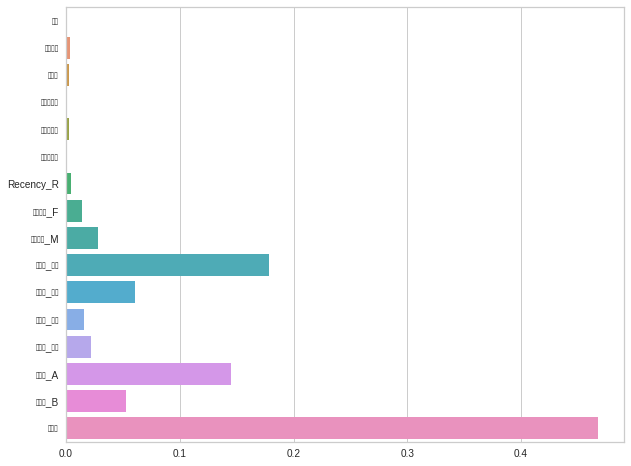

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (10, 8))
sns.barplot(x = model.feature_importances_, y = train2.iloc[:,1:].columns)
plt.show()

In [ ]:
train2

,고객번호,성별,거주지역,연령대,멤버십유무,경쟁사이용,온라인유무,Recency_R,구매횟수_F,구매금액_M,성장률_식품,성장률_패션,성장률_취미,성장률_주거,성장률_A,성장률_B,성장률
0,1,0,1,6,0,3,0,1,5,5,-7.749046,10.514467,19.537314,10.767839,-1.687883,-3.229486,-1.224629
1,2,0,2,6,0,3,0,1,5,5,-20.205018,-26.855967,-90.257285,18.428603,-8.376372,4.329783,-7.996814
2,3,0,1,6,0,0,0,2,3,1,-3.172042,0.000000,0.000000,2.735122,0.000000,0.000000,0.664081
3,4,1,1,6,0,2,0,4,2,3,4.252445,52.558412,0.000000,895.967611,4.409847,1110.613073,7.947751
4,6,1,4,6,0,0,0,4,5,4,-12.341177,8.275077,-23.829452,10.746208,15.502178,-10.446228,5.040894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18861,19333,1,0,2,1,0,1,5,5,1,2.952682,-88.161237,-88.404317,0.000000,-15.798864,-21.150330,-2.022324
18862,19334,0,7,3,1,3,0,1,4,3,-6.806238,48.640116,29.893722,521.195565,0.000000,-5.597460,-1.654216
18863,19335,1,14,3,1,0,0,2,3,3,23.412699,29.157819,-2.022212,-2.667569,1460.575086,13.790965,24.920909
18864,19336,1,1,3,0,0,0,1,2,4,9.106455,1820.162946,0.000000,0.000000,51.810682,0.000000,51.810682


In [ ]:
model.feature_importances_

array([0.00081374, 0.00384714, 0.0029809 , 0.00085716, 0.00237701,
       0.00097912, 0.00449111, 0.01424277, 0.0278652 , 0.17839891,
       0.06083292, 0.015597  , 0.02190567, 0.1448709 , 0.05276087,
       0.46717959])